<a href="https://colab.research.google.com/github/PieBot314/Python_Collab/blob/main/Gupta_02_26_21_Lesson21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 21: Meteorite Landings - Box Plots

### Overview

To learn the process of data cleaning, we will use NASA's meteorite landings dataset. But before that, let's learn about a meteoroid, meteor and meteorite to properly interpret the meteorite landings dataset.

**What is a meteoroid?**

A meteoroid is a solid rock-like object that gets separated from its parent body in outer space mostly due collision of asteroids which are humongous in size. It travels through the solar system and comes close to Earth. It's also referred to as a near-Earth object. 

**What is a meteor?**

A meteor, otherwise known as a shooting star or fireball, is a meteoroid that fires up and radiates energy when enters Earth's atmosphere.

**What is a meteorite?**

A meteorite is a meteor that falls on the earth's surface or ground. 

Refer to the image shown below to understand the difference between the three objects. They are the same object but named differently based on their location.

<img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/meteoroid_meteor_meteorite.png'>

*Image source: https://socratic.org/questions/how-are-meteoroids-meteors-and-meteorite-related*


**Why are meteorites important to scientists**?

Some of the meteorites called chondrites contain chondrules. A chondrule is a mineral grain and spherical. They were formed at the time of the birth of the solar system. Studying chondrules will help us understand the formation of the solar system. Hence, meteorites are important to scientists. The image below shows chondrules on a microscopic scale.

<img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/chondrules.png'>

*Image source: https://www.researchgate.net/profile/Fernando_Ortega-Gutierrez/publication/262623341/figure/fig5/AS:667618792976395@1536184132327/Photographs-of-chondrules-microscopic-observations-with-crossed-nicols-a-Barred.png*




**Note:** On the left-bottom corner, in the image above, you could see
$200 \mu m$ 
scale. The Greek letter
$\mu$ 
is read as **micro** meaning 
$10^{-6}$
and 
$m$
stands for meters. Hence, the scale of these four images is 
$200$
micrometer or 
$200 \times 10^{-6}$
meters.


---

#### The Data

The Meteoritical Society (link provided in the **Activities** section) collects data on meteorites that have fallen to Earth from outer space. The dataset contains the following variables for over 45,000 meteorites that have struck our planet:

1. `name`: the name of the place where a meteorite was found or observed.

2. `id`: a unique identifier for a meteorite.

3. `nametype`: one of the following:
    
    - `valid`: a typical meteorite.
    
    - `relict`: a meteorite that has been highly degraded by the weather on Earth.

4. `recclass`: the class of the meteorite; one of a large number of classes based on physical, chemical, and other characteristics. You can read the Wikipedia article (link provided in the **Activities** section) to learn about the meteorite classification.

  - Meteorite Type 1: Iron & Stony-iron meteorites. You can read about them in your free time after the class.

    <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-19/types-of-meteorite-1.jpg'>

    *Image source: https://spacecentre.co.uk/blog-post/edible-meteorites/*

  - Meteorite Type - 2: Stony meteorites. You can read about them in your free time after the class.

    <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-19/types-of-meteorite-2.jpg'>

    *Image source: https://spacecentre.co.uk/blog-post/edible-meteorites/*

5. `mass:` the mass of the meteorite, in grams

6. `fall`: whether the meteorite was seen falling, or was discovered after its impact; one of the following:

    - `Fell`: the meteorite's fall was observed.
    
    - `Found`: the meteorite's fall was not observed.

7. `year`: the year the meteorite fell, or the year it was found (depending on the value of fell).

8. `reclat`: the latitude of the meteorite's landing.

9. `reclong`: the longitude of the meteorite's landing.

10. `GeoLocation`: a parentheses-enclose, comma-separated tuple that combines reclat and reclong.

You don't have to memorise this list of variables. You can refer to it whenever you want to.

#### Acknowledgements

This dataset was downloaded from NASA's Data Portal (link provided in the **Activities** section), and is based on The Meteoritical Society's Meteoritical Bulletin Database (link provided in the **Activities** section). The latter database provides additional information such as meteorite images, links to primary sources, etc.

---

#### Notes On Missing Or Incorrect Data Points

The columns such as `recclass`, `reclat`, `reclong` begin with the `rec` keyword. It's a shorthand for *recommended*. They are the recommended values of the classes, latitudes and longitudes variables for the meteorites according to the Meteoritical Society. 

A few values in the `year` column were incorrectly entered into the dataset. Any year less than 860 or greater than 2021 is incorrect. It must be removed from the dataset. 

A few entries have latitude and longitude of `0N/0E` (off the western coast of Africa, where it would be quite difficult to recover meteorites). Many of these were actually discovered in Antarctica, but exact coordinates were not given. 


---

### Teacher-Student Activities

Throughout this project we will answer the following questions:

1. How does the geographical distribution of observed falls differ from that of found meteorites? 

2. What class of meteorites fall on Earth in abundance? Ideally, we want the chondrites to be larger in numbers because they contain chondrules.

In this class, we will just create a boxplot.

---

#### Activity 1: Loading The Dataset

Let's create a DataFrame for the meteorite landings dataset. Here's the link to the CSV file (don't click on it):

https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/meteorite-landings/meteorite-landings.csv

In [ ]:
# Student Action: Import the 'numpy', 'pandas' & 'matplotlib.pyplot' modules. Create a Pandas DataFrame. Display the first 5 rows of the DataFrame.
import pandas as pd, numpy as np, matplotlib.pyplot as plt
meteorite_df = pd.read_csv('https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/meteorite-landings/meteorite-landings.csv')
meteorite_df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [ ]:
# Student Action: Find the number of rows and columns in the DataFrame. 
meteorite_df.shape

(45716, 10)

---

#### Activity 2: Tuples

Actually, the output of `shape` keyword is another Python data structure called a **tuple**. Similar to a Python list, a tuple also stores multiple values separated by a comma. To create a tuple, use the common brackets `()`. To get a value in a tuple, you can use the **indexing** method that you also use in case of a Python list.

For example, to get the number of rows in the `met_df` DataFrame, you can simply write `met_df.shape[0]` which will give you the value at the `index=0`

In [ ]:
# Student Action: Get the number of rows in the 'met_df' DataFrame using the 'shape' keyword.
meteorite_df.shape[0]

45716

Similarly, you can also get the number of columns in the `met_df` DataFrame using the `shape` keyword.

In [ ]:
# Student Action: Get the number of columns in the 'met_df' DataFrame using the 'shape' keyword.
meteorite_df.shape[1]

We will learn more about tuples as we go on in this course.

---

#### Activity 3: The `describe()` Function^

As mentioned in the data description, the dataset contains few `year` values which are less than `860` and few `year` values which are greater than `2016`. We need to remove all of them because they were reported wrongly in the Meteorites Landings dataset.

But before that, we first need to check the range of values in the `year` column in the `met_df` DataFrame. For this exercise, we can use the `describe()` function. It returns all the necessary values such as the `count`, `min`, `max`, `mean`, `median` etc. for a series.

In [ ]:
# Teacher Action: Get the descriptive statistics for the 'year' values in the 'met_df' DataFrame. 
meteorite_df['year'].describe()

count    45428.000000
mean      1991.772189
std         27.181247
min        301.000000
25%       1987.000000
50%       1998.000000
75%       2003.000000
max       2501.000000
Name: year, dtype: float64

As you can see, we have got the summary of descriptive statistics for the `met_df['year']` series. You can also spot some of the values against the `25%, 50%` and `75%` parameters. They are called percentiles (or quartiles). Let's learn each of them one-by-one. Let's start with `25%`.

**Percentiles (or Quartiles)**

`25%` refers to the 
$25^{th}$ 
percentile value. It is also called the **first quartile** value. *The first quartile is defined as the middle number between the smallest number and the median of the dataset.* 

Let's understand this concept through an example. Consider the following series of numbers,

$3, 9, 6, 10, 7, 9, 7, 6, 1$

After arranging them in the increasing order, we have the following series

$1, 3, 6, 6, 7, 7, 9, 9, 10$

The median value of the series is 
$7$ 
because it is the middle value. So, the 
$25^{th}$ 
percentile (or first quartile) value will be the median of the following values

$1, 3, 6, 6, 7$

Therefore, first quartile or 
$Q1 = 6$ 
because 
$6$ 
is the median of the above sub-series.

**Note:** The median value is also referred to as the **second quartile** (or 
$50^{th}$ 
percentile) value.

Similarly, `75%` refers to the 
$75^{th}$ 
percentile value. It is also called the **third quartile** value. *The third quartile is the middle value between the median and the highest value of the dataset.*

So, the 
$75^{th}$ 
percentile (or third quartile) value will be the median of the following values

$7, 7, 9, 9, 10$

Therefore, third quartile or 
$Q3 = 9$ 
because 
$9$ 
is the median of the above sub-series.

*The first, second and third quartile values together tell the spread of the data. If a majority of the data points are spread apart from each other, then there will be a significantly large difference between the three quartile values whereas if a majority of the data points are close to each other, then all three quartile values will also be close to each other.*

In the 

$3, 9, 6, 10, 7, 9, 7, 6, 1$

series, the first, second and third quartile values are 
$Q1=6, Q2=7$ 
and 
$Q3=9$ 
respectively. This means the majority of the data points are quite close to each other which is quite evident from the series.

Similarly, in the case of the `year` column in the `met_df` DataFrame, the three quartile values are 
$Q1=1987, Q2=1998$ 
and 
$Q3=2003$
. This also suggests that the majority of the `year` values are quite close to each other. 

In the next class, we will learn how to visualise the spread of the data. For the time being, let's learn what is the standard deviation or `std` which is the next value in the descriptive statistics for the `year` column.


**Standard Deviation (or `std`)**

*The standard deviation is the square root of the mean of squared deviations.* It tells us how far away a data point is from the mean value. Larger the standard deviation, farther the data point from the mean value.

For the above series, the mean value
$(\mu)$
is 

$\mu = \frac{3+9+6+10+7+9+7+6+1}{9} = 6.44$

The **deviation** is the difference between the mean value and the individual data points in a series, i.e., 

$(3 - 6.44), (9 - 6.44), (6 - 6.44), (10 - 6.44), (7 - 6.44), (9 - 6.44), (7 - 6.44), (6 - 6.44), (1 - 6.44)$

are the deviations in the series. 

The **squared deviation** is the square of deviations, i.e., 

$(3 - 6.44)^2, (9 - 6.44)^2, (6 - 6.44)^2, (10 - 6.44)^2, (7 - 6.44)^2, (9 - 6.44)^2, (7 - 6.44)^2, (6 - 6.44)^2, (1 - 6.44)^2$

are the squared deviations in the series.

The **mean of squared deviations (or MSD)** is a sum of all the squared deviations divided by the number number of values, i.e., 

$\frac{(3 - 6.44)^2 + (9 - 6.44)^2 + (6 - 6.44)^2 + (10 - 6.44)^2 + (7 - 6.44)^2 + (9 - 6.44)^2 + (7 - 6.44)^2 + (6 - 6.44)^2 + (1 - 6.44)^2}{9}$

So, the standard deviation (or 
$std$
) is

$\sqrt{\frac{(3 - 6.44)^2 + (9 - 6.44)^2 + (6 - 6.44)^2 + (10 - 6.44)^2 + (7 - 6.44)^2 + (9 - 6.44)^2 + (7 - 6.44)^2 + (6 - 6.44)^2 + (1 - 6.44)^2}{9}}$

$\Rightarrow std = 2.92$

The significance of the standard deviation is that the numbers, 
$9, 6, 7, 9, 7, 6$
, from the series, lie in the range 
$(mean - std)$
and
$(mean + std)$
, i.e., 
$6.44 - 2.92 = 3.52$
and
$6.44 + 2.92 = 9.36$

So, these numbers are closest to the mean value.

The remaining three numbers, 
$1, 3$
and
$10$
lie in the range
$(mean - 2\times std)$
and
$(mean + 2\times std)$
. So, these three numbers are farthest from the mean value.

We can verify the above calculations by first creating a Pandas series using the `pd.Series()` function and then by applying the `describe()` function on the 
$3, 9, 6, 10, 7, 9, 7, 6, 1$ 
series.

**Note:** The MSD is also called **variance**. Therefore, 
$variance = \sigma^2$
where 
$\sigma$ 
is the standard deviation.

In [ ]:
# Student Action: Create a Pandas series for the [3, 9, 6, 10, 7, 9, 7, 6, 1] list and then get its descriptive statistics.
descriptive_pd = pd.Series([3, 9, 6, 10, 7, 9, 7, 6, 1])
descriptive_pd.describe()

count     9.000000
mean      6.444444
std       2.920236
min       1.000000
25%       6.000000
50%       7.000000
75%       9.000000
max      10.000000
dtype: float64

---

#### Activity 4: The Boxplot^^^

Let's visualise the spread of the values in the `year` column in the `met_df` DataFrame. For this, we will create a boxplot. It plots the minimum, first quartile, second quartile, third quartile and maximum values in the form of a box. 

<img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/boxplot_description.png' width='800'>

In a boxplot:

1. The leftmost vertical line denotes the 
$Q1 - 1.5 \times IQR$ 
value where 
    
    - $IQR$ 
      stands for *inter-quartile range*. Its value is equal to 
      $Q3 - Q1$

    - $Q1$ 
      denotes the first quartile value

    - $Q3$ 
      denotes the third quartile value

2. The left edge of the rectangle denotes the first quartile
   $(Q1)$
   value

3. The middle edge in the rectangle denotes the median 
   $(Q2)$ 
   value

4. The right edge of the rectangle denotes the third quartile 
   $(Q3)$ 
   value

5. The rightmost vertical line denotes the 
   $Q3 + 1.5 \times IQR$ 
   value in the series

6. The two horizontal lines are called whiskers. The length of these whiskers represent the number of values lying between the 
$Q1$ and $Q1 - 1.5 \times IQR$ 
values and the 
$Q3$ 
and 
$Q3 + 1.5 \times IQR$ 
values. **Smaller the length, the fewer number of values. Larger the length, more the number of values.**

7. The length of the rectangle also represents the number of values lying between the first and third quartile values.

8. The filled-circles beyond the vertical lines denote the **outliers**. The outliers in a dataset are those values which are unusually too large or too small. For example in the series 

$$1, 5, 2, 6, 4, 8, 5, 7, 9, 3, 121109, 459882$$

   the numbers $121109, 459882$ are unusually high values compared to the majority of values.

To create a boxplot, we will use the `boxplot()` function from the `seaborn` library. The `seaborn` is another library for data visualisation. It is built on top of the `matplotlib.pyplot` library. For all practical purposes, the `seaborn` library is an extension to the `matplotlib.pyplot` library. You can read more about the seaborn library by clicking on the link provided in the **Activities** section under the title **Seaborn Documentation**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


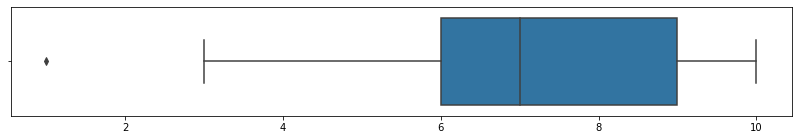

In [ ]:
# Teacher Action: Create a boxplot for the 'pd_series'.
import seaborn as sns
plt.figure(figsize=(14,2))
sns.boxplot(descriptive_pd)
plt.show()

As you can see, the boxplot helps us in knowing the spread of the data. Now, you create a boxplot for the `year` column in the `met_df` DataFrame to see the spread of the `year` values.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


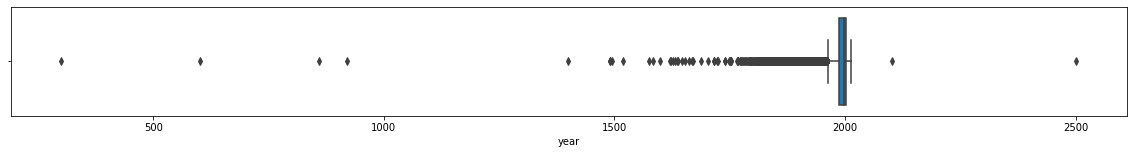

count    45428.000000
mean      1991.772189
std         27.181247
min        301.000000
25%       1987.000000
50%       1998.000000
75%       2003.000000
max       2501.000000
Name: year, dtype: float64

In [ ]:
 # Student Action: Create a boxplot for the 'year' values.
plt.figure(figsize=(20,2))
sns.boxplot(meteorite_df['year'])
plt.show()
meteorite_df['year'].describe()

As you can see, the boxplot for the `year` column in the `met_df` DataFrame is tightly squeezed. It shows that most of the year values are very close to each other. Specifically, most of the year values are roughly around the year `2000`.

Similarly, you create a boxplot for the `mass` column in the `met_df` DataFrame to observe the spread of the values.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


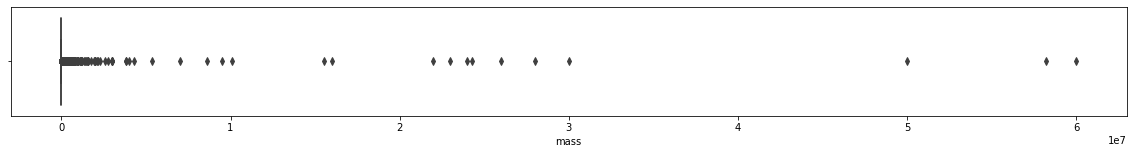

count    4.558500e+04
mean     1.327808e+04
std      5.749889e+05
min      0.000000e+00
25%      7.200000e+00
50%      3.260000e+01
75%      2.026000e+02
max      6.000000e+07
Name: mass, dtype: float64

In [ ]:
# Student Action: Create a boxplot for the 'mass' column in the 'met_df' DataFrame.
plt.figure(figsize=(20,2))
sns.boxplot(meteorite_df['mass'])
plt.show()
meteorite_df['mass'].describe()

From the plot, we can infer that most of the `mass` values are extremely squeezed around zero because the box has practically become a vertical line. Create a descriptive statistics summary for the `mass` column to further observe the variation in the `mass` values.

In [ ]:
# Student Action: Create a descriptive statistics summary for the 'mass' column.
meteorite_df['mass'].describe()

count    4.558500e+04
mean     1.327808e+04
std      5.749889e+05
min      0.000000e+00
25%      7.200000e+00
50%      3.260000e+01
75%      2.026000e+02
max      6.000000e+07
Name: mass, dtype: float64

As you can see, the `min = 0` grams, `25% = 7.2` grams, `50% = 32.6` grams and `75% = 202.6` grams. These values are not so close to each other. But because the other `mass` values are very high (especially the maximum mass value is `60,000` kg which is a lot compared to most of the `mass` values), the boxplot is extremely squeezed.

In the next class, we will learn how to slice a DataFrame to get some specific set of rows.

---